In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

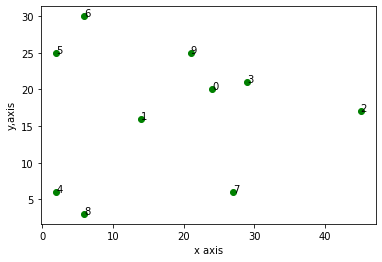

In [2]:
N = 10
A = 50
count = 0
countred = 0
a = 0
m = []
new = []
totalEG = []
d = []
rednode = []

nodes = np.round(1+(A-1)*np.random.random((N, 2)))
plt.plot(nodes[:, 0], nodes[:, 1], 'go')

for i in range(N):
    plt.text(nodes[i, 0], nodes[i, 1], i)
plt.xlabel('x axis')
plt.ylabel('y,axis')
energy = np.full((10, 1), 1000)


iteration:  1
Node:  9
neighbours= [0, 1, 3]
Energy remaining in nodes: 
[886] [886] [1000] [886] [1000] [1000] [1000] [1000] [1000] [897] 
iteration:  2
Node:  8
neighbours= [4]
Energy remaining in nodes: 
[886] [886] [1000] [886] [887] [1000] [1000] [1000] [803] [897] 
iteration:  3
Node:  6
neighbours= [5]
Energy remaining in nodes: 
[886] [886] [1000] [886] [887] [894] [892] [1000] [803] [897] 
iteration:  4
Node:  3
neighbours= [0, 9]
Energy remaining in nodes: 
[767] [886] [1000] [711] [887] [894] [892] [1000] [803] [778] 
iteration:  5
Node:  1
neighbours= [0, 5, 9]
Energy remaining in nodes: 
[640] [710] [1000] [711] [887] [767] [892] [1000] [803] [651] 
iteration:  6
Node:  0
neighbours= [1, 3, 7, 9]
Energy remaining in nodes: 
[480] [548] [1000] [549] [887] [767] [892] [838] [803] [489] 
iteration:  7
Node:  4
neighbours= [8]
Energy remaining in nodes: 
[480] [548] [1000] [549] [721] [767] [892] [838] [672] [489] 
iteration:  8
Node:  1
neighbours= [0, 5, 9]
Energy remaining

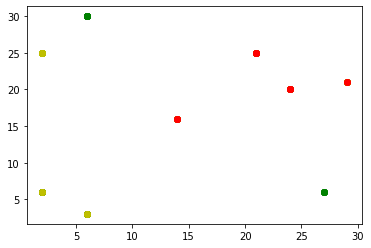

In [3]:
while(count < 10):
    d = []
    node = np.random.randint(10)
    count = count+1
    print("\niteration: ", count)
    print("Node: ", node)
    c = nodes[node]
    for i in range(N):
        distance = np.sqrt(
            np.square(nodes[i][0]-c[0])+np.square(nodes[i][1]-c[1]))
        if (distance > 0 and distance <= 15):
            d.append(i)

    print("neighbours=", d)
    ER = np.random.randint(100, 200)
    ET = np.random.randint(100, 200)
    energy[d] = (energy[d]-ER)
    energy[node] = (energy[node]-ET)
    energy[np.where(energy < 0)] = 0
    totalEG.append(np.sum(energy))
    print("Energy remaining in nodes: ")
    for i in range(N):
        print(energy[i], end=" ")
        if(energy[i] > 800 and energy[i] < 1000):
            plt.plot(nodes[i][0], nodes[i][1], 'go')
        elif(energy[i] > 500 and energy[i] < 800):
            plt.plot(nodes[i][0], nodes[i][1], 'yo')
        elif(energy[i] > 100 and energy[i] < 500):
            plt.plot(nodes[i][0], nodes[i][1], 'ro')
            countred = countred+1
            m.append(i)

    d = m[::-1]
    if (countred == 1):
        a = count

    flag = 0
    for i in range(N):
        if(energy[i] > 500):
            flag = 1
            break
    plt.ioff()
    if(flag == 0):
        break

In [4]:
for i in range(countred):
    for i in range(len(d)):
        if(d.count(i) > 1):
            d.remove(i)
rednode = d[::-1]
print("\nSequence of red nodes: ", rednode)
print("Total energy: ", totalEG)



Sequence of red nodes:  [0, 9, 9, 1, 9, 3]
Total energy:  [9555, 9245, 9031, 8618, 8061, 7253, 6956, 6415, 5933, 5502]


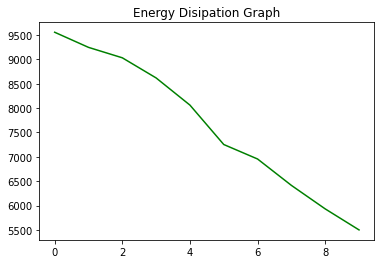

In [5]:
plt.figure(2)
plt.plot(totalEG[:], 'g')
plt.title("Energy Disipation Graph")
plt.show()


In [6]:
df = pd.read_csv(r'sdcReduced3.csv')
df.head()

,Temp.,Smoke,CO conc.,CO2 conc.,O2 conc.,Fire Label
0,25.8,0.299,0.074,1.03,21.0,0
1,25.8,0.296,0.078,1.03,21.0,0
2,25.9,0.299,0.077,1.03,21.0,0
3,25.8,0.296,0.073,1.03,20.9,0
4,25.9,0.302,0.077,1.03,21.0,0


In [7]:
df.count()

Temp.         5450
Smoke         5450
CO conc.      5450
CO2 conc.     5450
O2 conc.      5450
Fire Label    5450
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Fire Label'], axis='columns'), df['Fire Label'], test_size=0.2)

In [9]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
model.score(X_test, y_test)

0.9963302752293578

In [11]:
y_predicted = model.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[249,   1],
       [  3, 837]], dtype=int64)

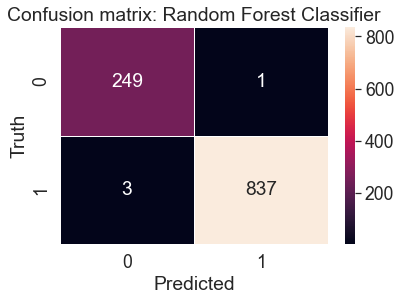

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.6)
plt.figure()
sns.heatmap(cm, annot=True, linewidths=1, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion matrix: Random Forest Classifier')
plt.savefig('variable_imp.png',dpi=300,bbox_inches="tight")
plt.show()

In [14]:
from sklearn.metrics import log_loss
log_loss(y_test,y_predicted)

0.12674853685970094

In [15]:
pred_prob1 = model.predict_proba(X_test)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

0.9996666666666667


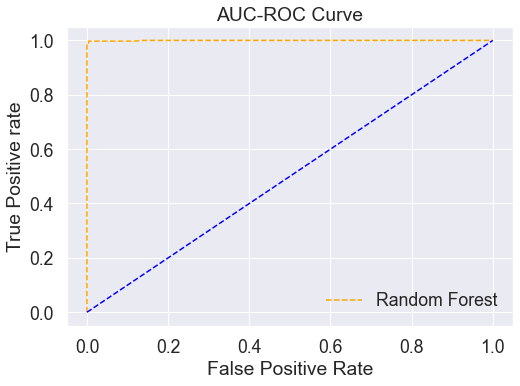

In [16]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
sns.set(font_scale=1.6)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.title("AUC-ROC Curve")
plt.show();


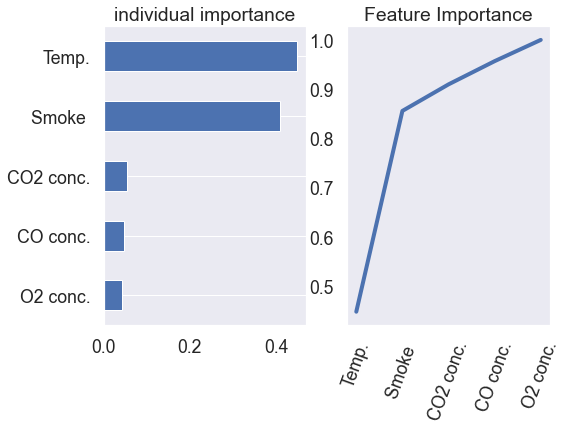

In [17]:
from sklearn import ensemble
import numpy as np
import matplotlib.pyplot as plt

sns.set(font_scale=1.6)
X = X_train
y = y_train
feature_names = df.drop('Fire Label', axis=1).columns.tolist()
model = ensemble.RandomForestClassifier(n_estimators=100,criterion="entropy", random_state=0)
model.fit(X,y)
importances = model.feature_importances_
dtf_importances = pd.DataFrame({"IMPORTANCE":importances,"VARIABLE":feature_names}).sort_values("IMPORTANCE",ascending=False)
dtf_importances['cumsum'] =  dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
ax[0].title.set_text('individual importance')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative importance')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4,legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)),xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.title("Feature Importance")
plt.savefig('variable_imp.png',dpi=300,bbox_inches="tight")
plt.show()


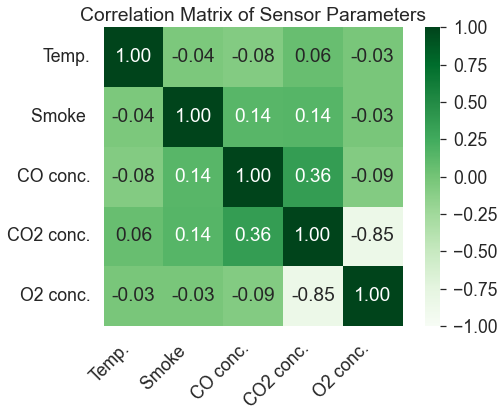

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot

pyplot.figure()
sns.set(font_scale=1.6)

df = pd.read_csv('sdcreduced3.csv')
data=df.drop(['Fire Label'], axis='columns')

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,
    cmap="Greens",
    annot=True, fmt=".2f"
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(
    ax.get_xticklabels(),
    rotation=0,
    horizontalalignment='right'
);
plt.title("Correlation Matrix of Sensor Parameters")
plt.savefig('allenabled_1.png',bbox_inches="tight")
